# Comparisons, Masks and Boolean Logic
### Created 01/17/2018

"Boolean mask" filtering or searching an array based on specific criteria. Ex: count all values > x, remove values < y, etc

## Ex: count # rainy days

In [1]:
import numpy as np
import pandas as pd

# using pandas to get rainfall inches per day in Seattle as NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values # just gets values from PRCP column

In [2]:
rainfall

array([  0,  41,  15,   0,   0,   3, 122,  97,  58,  43, 213,  15,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   0,
         0,  89, 216,   0,  23,  20,   0,   0,   0,   0,   0,   0,  51,
         5, 183, 170,  46,  18,  94, 117, 264, 145, 152,  10,  30,  28,
        25,  61, 130,   3,   0,   0,   0,   5, 191, 107, 165, 467,  30,
         0, 323,  43, 188,   0,   0,   5,  69,  81, 277,   3,   0,   5,
         0,   0,   0,   0,   0,  41,  36,   3, 221, 140,   0,   0,   0,
         0,  25,   0,  46,   0,   0,  46,   0,   0,   0,   0,   0,   0,
         5, 109, 185,   0, 137,   0,  51, 142,  89, 124,   0,  33,  69,
         0,   0,   0,   0,   0, 333, 160,  51,   0,   0, 137,  20,   5,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
         0,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  18,  64,   0,   5,  36,  13,   0,
         8,   3,   0,   0,   0,   0,   0,   0,  18,  23,   0,   

In [4]:
inches = rainfall / 254.0 # notebook says 1/10mm -> inches
# units in the csv file are in 1/10 millimeters for some reason. Not important! move on!
inches

array([ 0.        ,  0.16141732,  0.05905512,  0.        ,  0.        ,
        0.01181102,  0.48031496,  0.38188976,  0.22834646,  0.16929134,
        0.83858268,  0.05905512,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.01968504,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.3503937 ,  0.8503937 ,  0.        ,
        0.09055118,  0.07874016,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.2007874 ,  0.01968504,
        0.72047244,  0.66929134,  0.18110236,  0.07086614,  0.37007874,
        0.46062992,  1.03937008,  0.57086614,  0.5984252 ,  0.03937008,
        0.11811024,  0.11023622,  0.0984252 ,  0.24015748,  0.51181102,
        0.01181102,  0.        ,  0.        ,  0.        ,  0.01968504,
        0.7519685 ,  0.42125984,  0.6496063 ,  1.83858268,  0.11811024,
        0.        ,  1.27165354,  0.16929134,  0.74015748,  0.  

In [6]:
inches.shape # 1 value for each day

(365,)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles. seaborn is a set of themes and tools  to work
# with matplotlib

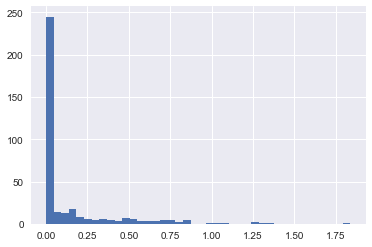

In [10]:
plt.hist(inches, 40);

We can see that most days of the year in Seattle in 2014 recorded 0 inches of rain. But we want to know more about the data so we 
## Dig through the data

Tools to use

``<`` and ``>`` are numpy ufuncs that will do element wise comparisons. Output is ``logical`` aka ``Boolean``. But not ``0 | 1`` like matlab

In [11]:
x = np.array([1, 2, 3, 4, 5])

In [13]:
print(x <  3) # less than
print(x <= 3) # less than or equal to
print(x >  3) # greater than
print(x >= 3) # greater than or equal to

[ True  True False False False]
[ True  True  True False False]
[False False False  True  True]
[False False  True  True  True]


In [14]:
print(x == 3) # equal to
print(x != 3) # not equal to

[False False  True False False]
[ True  True False  True  True]


In [15]:
# can compare each element of an array and use operations in the comparison
(x * 2) == (x ** 2)

array([False,  True, False, False, False], dtype=bool)

In [17]:
# work on arrays of any size or shape
rng = np.random.RandomState(0) #specifying the RandomState gives us the same rng output that he gets
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [18]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]], dtype=bool)

## How to work with the boolean array output
using x from above

In [20]:
# I guess True | False is actually stored as 1 | 0
np.count_nonzero(x < 6)
# counts 1s or Trues

8

In [21]:
np.sum(x < 6) # same output because it adds the 1s

8

In [22]:
# but we can specify which axis to use with np.sum
np.sum(x < 6, axis = 1) # sum along 1st axis, sum for each row

array([4, 2, 2])

In [23]:
# any values that satisfy our boolean?
np.any(x > 8)

True

In [24]:
np.any(x < 0)

False

In [25]:
# do all values satisfy our boolean?
np.all(x < 10)

True

In [26]:
np.all(x < 6)

False

In [27]:
# can specify the axis to use np.any or np.all as well
np.all(x < 8, axis = 1)

array([ True, False,  True], dtype=bool)

## Bitwise logic operators
``&`` : and. ``|`` : or. ``^`` : xor. ``~`` : not.

In [28]:
np.sum((inches > 0.5) & (inches < 1.0))

29

In [29]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## Use boolean arrays to index (mask) into another array

In [30]:
x[x < 5] # returns a list of all the values that pass the condition
# ordered left to right through each row top to bottom

array([0, 3, 3, 3, 2, 4])

In [31]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [34]:
# mask of all rainy days
rainy = inches > 0

# mask of all summer days (days 172 - 262)
days = np.arange(365)
summer = (days > 172) & (days < 262) # Trues for all days in the range, not the numbers

In [35]:
# Median precip on rainy days
np.median(inches[rainy])

0.19488188976377951

In [36]:
# medain precip on summer days
np.median(inches[summer])

0.0

In [37]:
# max precip on a summer day in 2014
np.max(inches[summer])

0.85039370078740162

In [38]:
# median precip on rainy days not in summer
np.median(inches[rainy & ~summer])

0.20078740157480315

using ``and, or`` instead of ``&, |``. The words, or function use, applies to the entire object, while the symbolic form applies to the bits in each object. In python, all non-zero integers are ``True``

In [39]:
bool(42)

True

In [40]:
bool(0)

False

In [41]:
bool(42 and 0)

False

In [42]:
bool(42 or 0)

True

In [43]:
bin(42)

'0b101010'

In [44]:
bin(59)

'0b111011'

In [45]:
bin(42 & 59) # compares each bit location at a time, so first spot 1 and 1 is True, next 0 and 1 is false

'0b101010'

In [46]:
bin(42 | 59)

'0b111011'

__Basically, use symbols instead of ``and`` ``or``__

In [47]:
# as in
42 or 59

42

In [48]:
42 | 59

59

In [49]:
x = np.arange(10)

In [50]:
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False, False], dtype=bool)

In [51]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## End 01/18/2018 a little > 1 hr